# Hands-on lattice calculations for the AUTH 2024 Accelerator Phyiscs course
*T. Prebibaj, F. Asvesta, Y. Papaphilippou*

---

# Part III: Tracking multiple particles in a beamline

Exercises to track multiple particles in beamlines.

---

In [17]:
# Import custom tracking functions and useful libraries
from tracking_library import *
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Exercise 10: phase space area

- Define an ensemble of 10000 particles with an arbitrary first order ($x_0 = 0.2$ mm, $x'_0 = 1$ mrad) and second order momenta($\sigma_{x_0}$ and $\sigma_{x'_0}$).

- Transport the beam distribution in a drift of length 1 m. Visualise the initial and final distribution in phase space. What do you observe?

   **Hint:** One can use the `seaborn` package to nicely see a 2D distribution, as Exercise 2. 

- Consider 3 particles (e.g. the first 3 of your ensample) such that they define a triangle of surface A. Verify that this linear transport preserve the area of the triangle.

    **Hint:** the area of a triangle in phase space can be computed using linear algebra:
    ```
    from numpy.linalg import norm
    def area(a, b, c) :
        '''a,b,c are the phase-space coordinates of three particles'''
        return 0.5 * norm( np.cross( b-a, c-a ) )
    ```

In [18]:
# code here your solution...

# Initializing the beam
N = 10000
X_0 = np.array([np.random.normal(0,1,N),
                np.random.normal(0,1,N)])
x0 = 0
xp0 = 1
sigx = 1
sigxp = 0.5
X_0[0,:] = sigx*X_0[0,:]+x0
X_0[1,:] = sigxp*X_0[1,:]+xp0

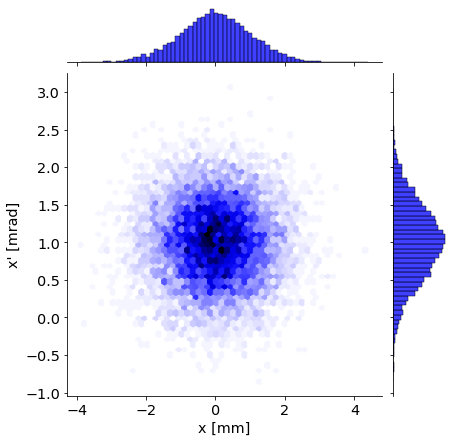

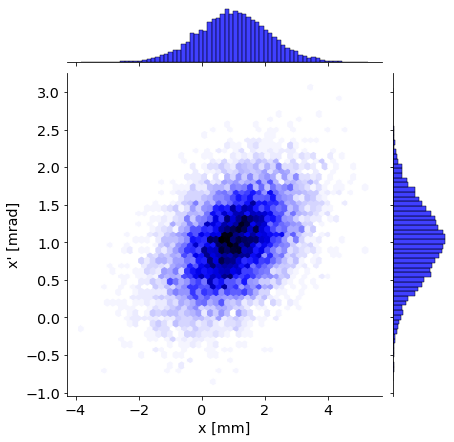

In [19]:
# code here your solution

# Drift matrix
myDrift = D(1)[0]['matrix'] # remember that D(L) is the function
X_1 =  myDrift @ X_0

# Before the drift
g = sns.jointplot(x=X_0[0,:], y=X_0[1,:], kind="hex", color="b")
g.set_axis_labels("x [mm]", "x' [mrad]")

# After the drift
g = sns.jointplot(x=X_1[0,:], y=X_1[1,:],
                  kind="hex", color="b")
g.set_axis_labels("x [mm]", "x' [mrad]")

**Note that the distribution in phase space is now a "tilted" ellipse!**

In [20]:
# this is the formula of the area of a triangle
from numpy.linalg import norm
def area(a, b, c) :
    '''a,b,c are the phase-space coordinates of three particles'''
    return 0.5 * norm( np.cross( b-a, c-a ) )

In [21]:
# code here your solution...
# we take the first three particles in the beam (arbitrary choise)
print(f"Before transport {area(X_0[:,0],X_0[:,1],X_0[:,2])}")
print(f"After transport {area(X_1[:,0],X_1[:,1],X_1[:,2])}")

Before transport 0.10816865423543268
After transport 0.10816865423543265


Text(0.5, 1.0, 'Exercise 10')

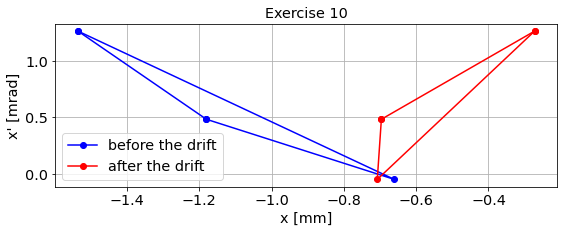

In [22]:
# Visualizing this:

plt.figure(figsize=(9,3))

#first triangle
plt.plot(X_0[:,:3][0],X_0[:,:3][1],'o-b')
plt.plot(X_0[:,[2,0]][0],X_0[:,[2,0]][1],'o-b', label='before the drift')

#second triangle
plt.plot(X_1[:,:3][0],X_1[:,:3][1],'o-r')
plt.plot(X_1[:,[2,0]][0],X_1[:,[2,0]][1],'o-r',label='after the drift')

plt.legend()
plt.xlabel('x [mm]')
plt.ylabel("x' [mrad]")
plt.grid(True)
plt.title('Exercise 10')

### Exercise 11: evolution of beam size along a beamline
- Using the 100 FODO cells of $L=1$ mm and $f=2.5$ mm, transport the beam of the previous exercise. Plot the particle trajectories.

- Plot the mean (i.e. the beam centroid) and standard deviation (i.e. beam size) of the x coordinates along the beam line as well as the mean and standard deviation of x'. 
    
    **Hint:** Remember that in the output of our `transportParticles` function the key `'x'` contains a 2D array with N rows (the index of the position along the beam line) and M columns (the index of a given particle). Moreover, you can compute the standard deviation of **each raw** of a NxM 2D array as `np.std(N_times_M_array,1)`. 

In [91]:
# code here your solution...

# Defining the beam line
f = 2.5
L = 1
FODO = D(L) + Q(f) + D(L) + Q(-f) # here we start at the beggining of the first drift (doesn't really matter...)
beamline = FODO*100

# Initializing the beam
N = 1000
X_0 = np.array([np.random.normal(0,1,N),
                np.random.normal(0,1,N)])
x0 = 0
xp0 = 1
sigx = 1
sigxp = 0.5
X_0[0,:] = sigx*X_0[0,:]+x0
X_0[1,:] = sigxp*X_0[1,:]+xp0

# Track
transported_particles = transportParticles(X_0, beamline)

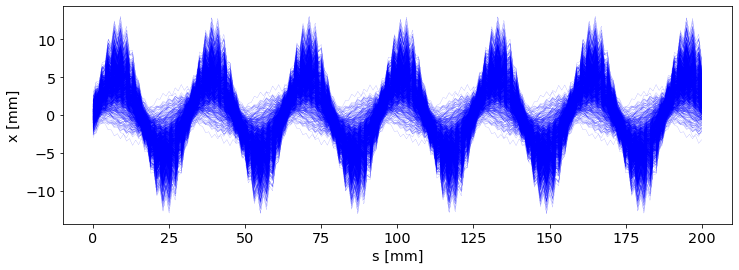

In [92]:
# code here your solution..

plt.figure(figsize=(12, 4))
plt.plot(transported_particles['s'], transported_particles['x'], c='blue', linewidth=0.1)
plt.xlabel('s [mm]')
plt.ylabel('x [mm]')
plt.show()

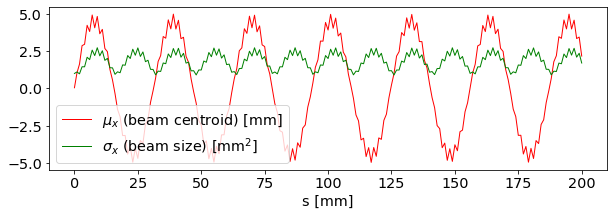

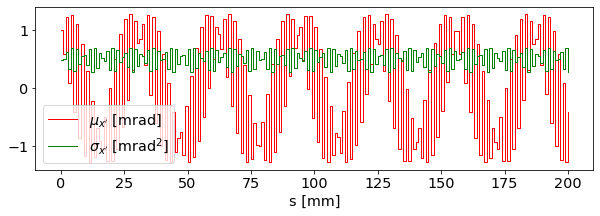

In [93]:
# code here your solution..

plt.figure(figsize=(10, 3))
plt.plot(transported_particles['s'], np.mean(transported_particles['x'],1), c='red', linewidth=1, label=r'$\mu_{x}$ (beam centroid) [mm]')
plt.plot(transported_particles['s'], np.std(transported_particles['x'],1), c='green', linewidth=1, label=r'$\sigma_{x}$ (beam size) [mm$^2$]')
plt.xlabel('s [mm]')
plt.legend()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(transported_particles['s'], np.mean(transported_particles['xp'],1), c='red', linewidth=1, label=r"$\mu_{x'}$ [mrad]")
plt.plot(transported_particles['s'], np.std(transported_particles['xp'],1), c='green', linewidth=1, label=r"$\sigma_{x'}$ [mrad$^2$]")
plt.xlabel('s [mm]')
plt.legend()
plt.show()

**It can be show that the average position of a beam along a beam line is the same as the the trajectory of single particle particle that starts in the center of the initial particle distribution.**

## 5) Beam emittance

- One can easily demonstrate that the same matrix ($M$) used for tracking the coordinates ($(x_i, x'_i)$) of each single particle ($i$) from an initial point ($X_0$) to a final point ($X_s$) in a beamline:

    \begin{equation}
    X_s =  M\, X_0
    \end{equation}

  can also be used to track the **average trajectory** ($\langle X \rangle$) as well as the **covariance or sigma matrix** of the given particle coordinates distribution:

    \begin{equation}
    \langle X_s \rangle = 
    \left[
    \begin{array}{c}
    \langle x_i \rangle\\
    \langle x'_i \rangle
    \end{array}
    \right]_s 
    = M\, \langle X_0 \rangle
    \end{equation}

    \begin{equation}
    \Sigma_s := \left[
    \begin{array}{c}
    \langle x_i^2 \rangle \quad \langle x_i x'_i \rangle\\
    \langle x'_i x_i \rangle \quad \langle x_i^{'2} \rangle
    \end{array}
    \right]_s = \left[
    \begin{array}{c}
    \sigma_{x}^2\quad \sigma_{x}\sigma_{x'}\\
    \sigma_{x}\sigma_{x'}\quad \sigma_{x'}^2
    \end{array}
    \right]_s
    = M\, \Sigma_0\, M^T\, .
    \end{equation}

    We can therefore track the **average trajectory** and **covariance** of a beam simply starting from its initial average coordinates and covariance matrix in phase space.


- The sigma/covariance matrix is usually parametrized as:

    \begin{equation}
    \left[
    \begin{array}{c}
    \sigma_{x}^2\quad \sigma_{x}\sigma_{x'}\\
    \sigma_{x}\sigma_{x'}\quad \sigma_{x'}^2
    \end{array}
    \right] =
        \epsilon
        \left[ 
        \begin{array}{cc}
            \beta   & -\alpha\\
            -\alpha & \gamma
        \end{array}
        \right] 
    \end{equation}

    where $\beta$, $\alpha$, $\gamma$ and $\epsilon$ are parameters such that $\epsilon = \sqrt{\det(\Sigma)}$ and $\beta \gamma - \alpha^2 = 1$. **This seems to be an arbitrary choice!** but it will acquire more special meaning later.

- We recall that $M$ is a real **symplectic** transformation, and its determinant is $\det(M) = +1$, therefore:

    \begin{equation}
    \epsilon_s^2 = \det(\Sigma_s) = \det( M\, \Sigma_0\, M^T ) = \det(M) \det(\Sigma_0) \det(M^T) = \det(\Sigma_0) = \epsilon_0^2
    \end{equation}

    which means that the quantity $\epsilon$ (the beam **statistical emittance**) is **preserved** along a beamline.

### Exercise 12: preservation of emittance

- Calculate the sigma matrix of the previous example (at all s-positions of the beamline) and plot the emittance along the s-position. 
- Calculate the $\alpha$, $\beta$ and $\gamma$ parameters from the sigma matrix (Twiss parameters). Plot them and verify that $\beta\gamma-\alpha^2=1$.

In [95]:
# code here your solution..

sigmas = [] 
for i in range(len(transported_particles['s'])): # for every s-location of our lattice
    x_of_all_particles_at_s = transported_particles['x'][i,:]
    xp_of_all_particles_at_s = transported_particles['xp'][i,:]
    sigmas.append(np.cov(x_of_all_particles_at_s, xp_of_all_particles_at_s))
sigmas = np.array(sigmas)

# compute the emittance as sqrt of the determinant of all sigma matrices along 
# the beamline
emittance = np.sqrt(np.linalg.det(sigmas))
beamsize = np.sqrt(sigmas[:,0,0]) # is the same as np.std(transported_particles['x'],1)

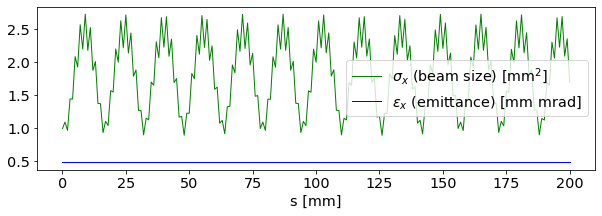

In [96]:
plt.figure(figsize=(10, 3))
plt.plot(transported_particles['s'], beamsize, c='green', linewidth=1, label=r'$\sigma_{x}$ (beam size) [mm$^2$]')
plt.plot(transported_particles['s'], emittance, c='blue', linewidth=1, label=r'$\epsilon_x$ (emittance) [mm mrad]')
plt.xlabel('s [mm]')
plt.legend()
plt.show()

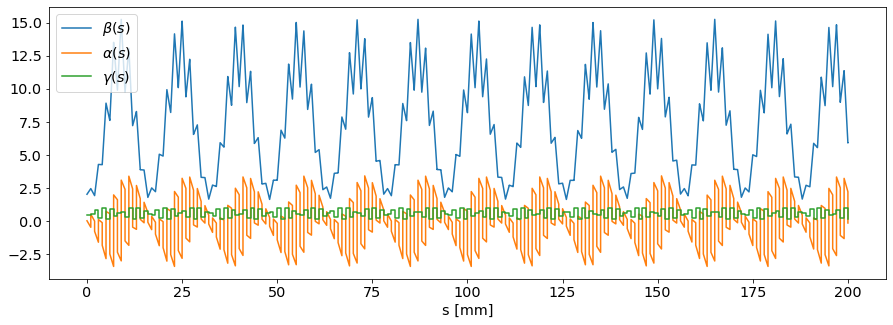

In [102]:
beta = beamsize**2/emittance
alpha = -sigmas[:,0,1]/emittance
gamma = sigmas[:,1,1]/emittance
plt.plot(transported_particles['s'], beta, label=r'$\beta(s)$')
plt.plot(transported_particles['s'], alpha, label=r'$\alpha(s)$')
plt.plot(transported_particles['s'], gamma, label=r'$\gamma(s)$')
plt.xlabel('s [mm]')
plt.legend()
plt.show()

assert (beta*gamma - alpha**2).all()==1

> Note: beta function affects the size of the beam, alpha function affects the tilt of the beam, and gamma function affects the divergence of the beam.